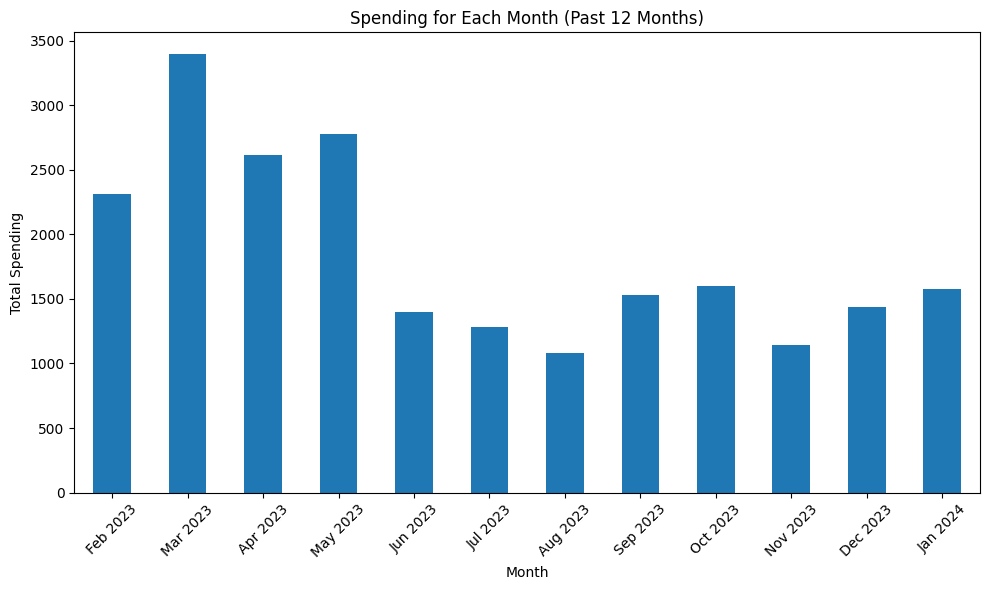

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Read the CSV file
df = pd.read_csv('data/transactions_history.csv')

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract month and year
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Extract month and year
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Get the current year and month
current_year = pd.Timestamp.now().year
current_month = pd.Timestamp.now().month

# Calculate the starting month and year for the past 12 months
start_month = current_month - 12
start_year = current_year

# Adjust the starting month and year if needed
if start_month <= 0:
    start_month += 12
    start_year -= 1

# Filter data for the past 12 months
df_last_12_months = df[(df['year'] > start_year) | ((df['year'] == start_year) & (df['month'] >= start_month))]

# Group by month and sum the 'debit' column
monthly_spending = df_last_12_months.groupby(['year', 'month'])['debit'].sum()

# Generate labels with month and year
labels = [f"{pd.Timestamp(year, month, 1).strftime('%b %Y')}" for year, month in monthly_spending.index]

# Plot the bar graph
plt.figure(figsize=(10, 6))
monthly_spending.plot(kind='bar')
plt.title('Spending for Each Month (Past 12 Months)')
plt.xlabel('Month')
plt.ylabel('Total Spending')
plt.xticks(range(len(labels)), labels, rotation=45)  # Use labels with month and year
plt.tight_layout()
plt.show()

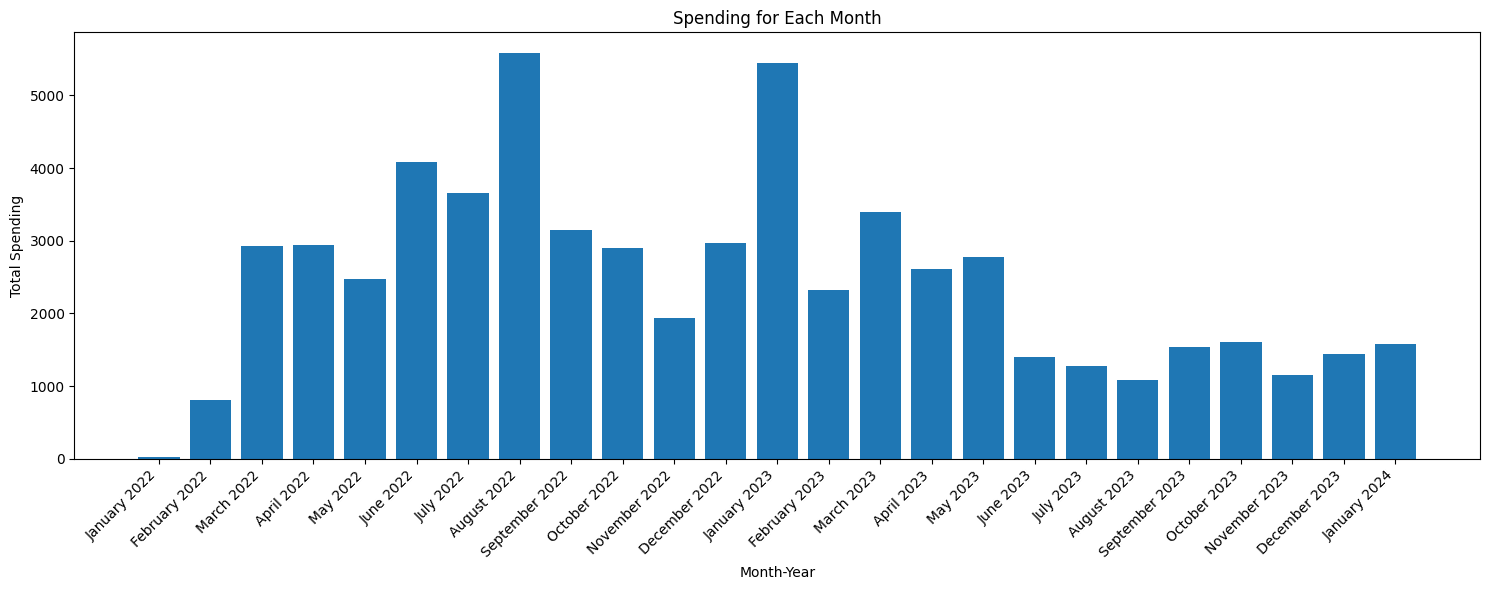

In [28]:
df = pd.read_csv('data/transactions_history.csv')

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract month and year
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Group by month and year and sum the 'debit' column
monthly_spending = df.groupby(['year', 'month'])['debit'].sum()

# Generate labels with month and year
labels = [f"{calendar.month_name[month]} {year}" for (year, month), value in monthly_spending.items()]

# Plot the bar graph with adjusted settings
plt.figure(figsize=(15, 6))  # Increase figure width to accommodate all labels
plt.bar(labels, monthly_spending.values)
plt.title('Spending for Each Month')
plt.xlabel('Month-Year')
plt.ylabel('Total Spending')
plt.xticks(rotation=45, ha='right')  # Rotate labels and align them to the right
plt.tight_layout()
plt.show()

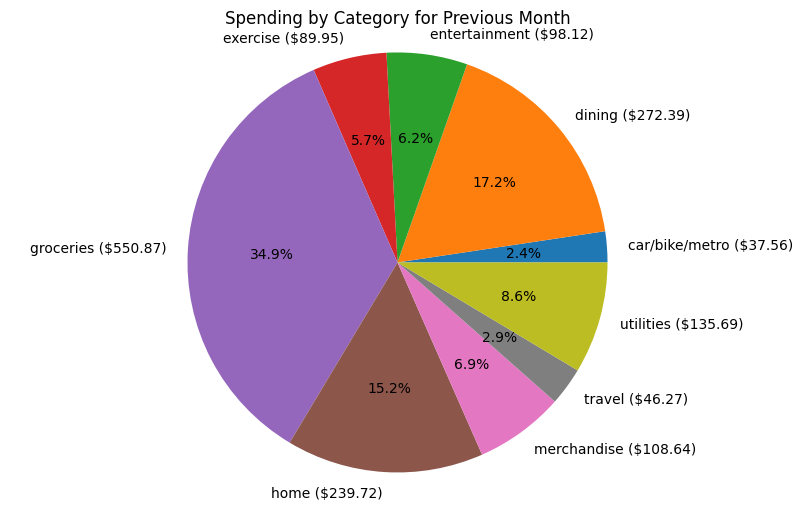

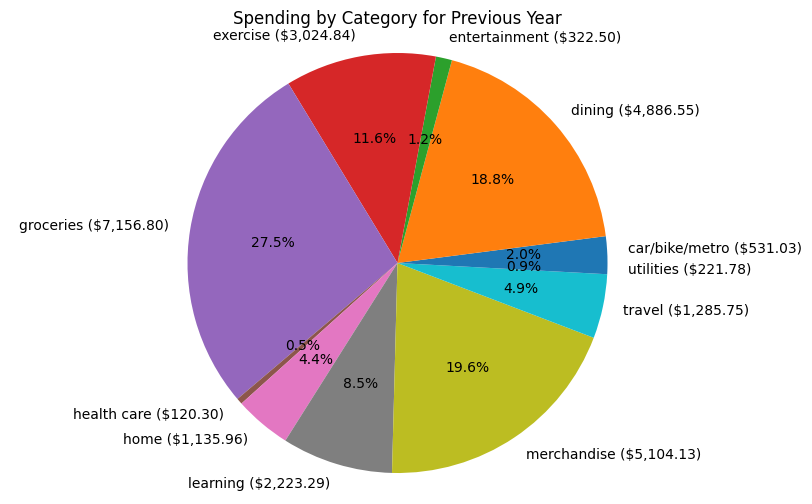

In [29]:
# Filter data for the previous month and previous year
previous_month_data = df[(df['year'] == current_year) & (df['month'] == current_month - 1)]
previous_year_data = df[(df['year'] == current_year - 1)]

# Group by category and sum the 'debit' column for the previous month and previous year
previous_month_spending = previous_month_data.groupby('category')['debit'].sum()
previous_year_spending = previous_year_data.groupby('category')['debit'].sum()

# Plot pie chart for previous month
plt.figure(figsize=(10, 6))
plt.pie(previous_month_spending, labels=[f"{category} (${spending:,.2f})" for category, spending in zip(previous_month_spending.index, previous_month_spending)], autopct='%1.1f%%')
plt.title('Spending by Category for Previous Month')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Plot pie chart for previous year
plt.figure(figsize=(10, 6))
plt.pie(previous_year_spending, labels=[f"{category} (${spending:,.2f})" for category, spending in zip(previous_year_spending.index, previous_year_spending)], autopct='%1.1f%%')
plt.title('Spending by Category for Previous Year')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()